* The accuracy of our model on the validation data would peak after training for a number of epochs, and would then start decreasing, aka, our model would overfit to the training data
* If you train for too long though, the model will start to overfit and learn patterns from the training data that don't generalize to the test data. What we really want is to develop models that generalize well to a testing data
* The opposite of overfitting is underfitting. This occurs when there is still room for improvement on the test data. 
* To prevent overfitting, the best solution is to use more training data.
* When that is no longer possible, the next best solution is to use techniques like regularization
* Four common regularization techniques: 
  * weight regularization
  * dropout
  * data-augmentation
  * batch normalization

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


##### Prepare the data
Multi-hot-encoding our lists means turning them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all- zeros except for indices 3 and 5, which would be ones.

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)


Let's look at one of the resulting multi-hot vectors. The word indices are sorted by frequency, so it is expected that there are more 1-values near index zero, as we can see in this plot:

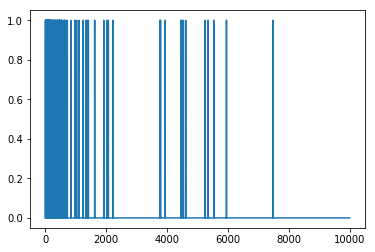

In [3]:
plt.plot(train_data[0])

##### Demonstrate overfitting

* The simplest way to prevent overfitting is to reduce the size of the model
* Size of the model = the number of learnable parameters in the model 
* The size is determined by the number of layers and the number of units per layer
* In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity"
* A model with more parameters will have more "memorization capacity"
* Deep learning models tend to be good at fitting to the training data, 
* The real challenge is generalization, not fitting.
* A model is useless when making predictions on previously unseen data

* If the network has limited memorization resources, it will not be able to learn the mapping as easily
* To minimize its loss, it will have to learn compressed representations that have more predictive power.
* If you make your model too small, it will have difficulty fitting to the training data
* There is a balance between "too much capacity" and "not enough capacity".
* There is no magical formula to determine the right size or architecture of your model
* You will have to experiment to determine the number of layers, or what the right size for each layer. 

Formula:
1. To find an appropriate model size, it's best to start with relatively few layers and parameters
2. Increase the size of the layers or adding new layers until you see diminishing returns on the validation loss

##### Baseline Model

In [4]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.4976 - acc: 0.7943 - binary_crossentropy: 0.4976 - val_loss: 0.3386 - val_acc: 0.8742 - val_binary_crossentropy: 0.3386
Epoch 2/20
 - 2s - loss: 0.2509 - acc: 0.9098 - binary_crossentropy: 0.2509 - val_loss: 0.2841 - val_acc: 0.8877 - val_binary_crossentropy: 0.2841
Epoch 3/20
 - 3s - loss: 0.1836 - acc: 0.9356 - binary_crossentropy: 0.1836 - val_loss: 0.2876 - val_acc: 0.8862 - val_binary_crossentropy: 0.2876
Epoch 4/20
 - 2s - loss: 0.1472 - acc: 0.9498 - binary_crossentropy: 0.1472 - val_loss: 0.3128 - val_acc: 0.8794 - val_binary_crossentropy: 0.3128
Epoch 5/20
 - 3s - loss: 0.1223 - acc: 0.9592 - binary_crossentropy: 0.1223 - val_loss: 0.3377 - val_acc: 0.8747 - val_binary_crossentropy: 0.3377
Epoch 6/20
 - 2s - loss: 0.1017 - acc: 0.9677 - binary_crossentropy: 0.1017 - val_loss: 0.3677 - val_acc: 0.8699 - val_binary_crossentropy: 0.3677
Epoch 7/20
 - 3s - loss: 0.0852 - acc: 0.9747 - binary_crossentropy:

##### Smaller model

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5639 - acc: 0.7755 - binary_crossentropy: 0.5639 - val_loss: 0.4494 - val_acc: 0.8556 - val_binary_crossentropy: 0.4494
Epoch 2/20
 - 2s - loss: 0.3590 - acc: 0.8902 - binary_crossentropy: 0.3590 - val_loss: 0.3426 - val_acc: 0.8785 - val_binary_crossentropy: 0.3426
Epoch 3/20
 - 3s - loss: 0.2669 - acc: 0.9150 - binary_crossentropy: 0.2669 - val_loss: 0.3005 - val_acc: 0.8884 - val_binary_crossentropy: 0.3005
Epoch 4/20
 - 2s - loss: 0.2197 - acc: 0.9278 - binary_crossentropy: 0.2197 - val_loss: 0.2876 - val_acc: 0.8876 - val_binary_crossentropy: 0.2876
Epoch 5/20
 - 3s - loss: 0.1900 - acc: 0.9393 - binary_crossentropy: 0.1900 - val_loss: 0.2861 - val_acc: 0.8855 - val_binary_crossentropy: 0.2861
Epoch 6/20
 - 2s - loss: 0.1680 - acc: 0.9449 - binary_crossentropy: 0.1680 - val_loss: 0.2858 - val_acc: 0.8858 - val_binary_crossentropy: 0.2858
Epoch 7/20
 - 3s - loss: 0.1506 - acc: 0.9533 - binary_crossentropy:

In [ ]:
##### Bigger Model

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.3458 - acc: 0.8504 - binary_crossentropy: 0.3458 - val_loss: 0.2941 - val_acc: 0.8819 - val_binary_crossentropy: 0.2941
Epoch 2/20
 - 6s - loss: 0.1408 - acc: 0.9490 - binary_crossentropy: 0.1408 - val_loss: 0.3537 - val_acc: 0.8638 - val_binary_crossentropy: 0.3537
Epoch 3/20
 - 6s - loss: 0.0482 - acc: 0.9852 - binary_crossentropy: 0.0482 - val_loss: 0.4224 - val_acc: 0.8695 - val_binary_crossentropy: 0.4224
Epoch 4/20
 - 6s - loss: 0.0091 - acc: 0.9985 - binary_crossentropy: 0.0091 - val_loss: 0.5827 - val_acc: 0.8714 - val_binary_crossentropy: 0.5827
Epoch 5/20
 - 6s - loss: 0.0012 - acc: 1.0000 - binary_crossentropy: 0.0012 - val_loss: 0.6848 - val_acc: 0.8696 - val_binary_crossentropy: 0.6848
Epoch 6/20
 - 6s - loss: 2.6318e-04 - acc: 1.0000 - binary_crossentropy: 2.6318e-04 - val_loss: 0.7281 - val_acc: 0.8710 - val_binary_crossentropy: 0.7281
Epoch 7/20
 - 6s - loss: 1.3869e-04 - acc: 1.0000 - binary_c

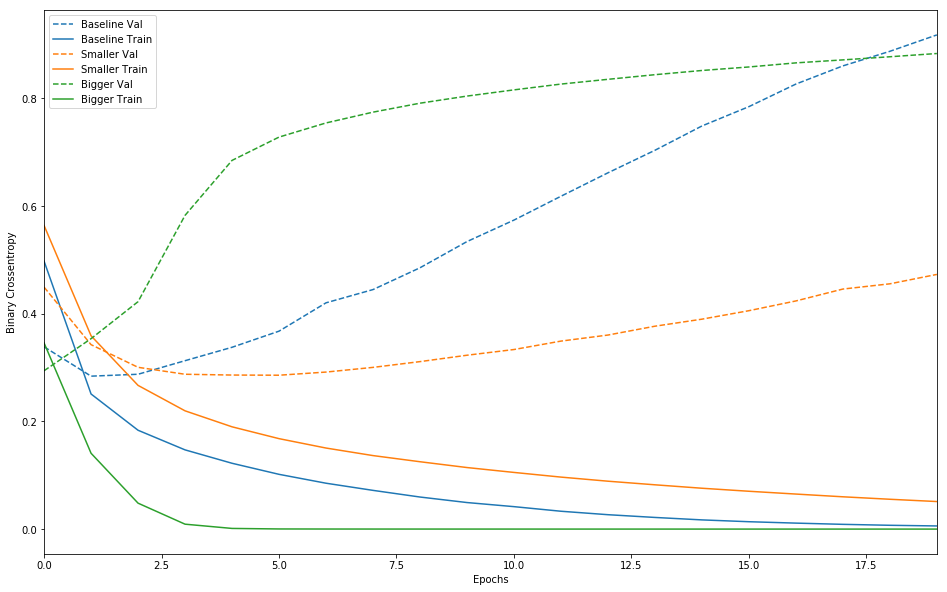

In [12]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

##### Plot the training and validation loss
* The solid lines show the training loss 
* The dashed lines show the validation loss
* A lower validation loss indicates a better model 
* The more capacity the network has, 
    * The quicker it will be able to model the training data (resulting in a low training loss), 
    * But, it is more susceptible it is to overfitting (resulting in a large difference between the training and validation loss).

##### The smaller network
* Begins overfitting later than the baseline model (after 6 epochs rather than 4) 
* The performance of the smaller network starts to degrades much more slowly once it starts overfitting.

##### The larger network 
* Begins overfitting almost right away, after just one epoch, 
* It overfits much more severely. 

### Strategies

##### Add weight regularization

* Occams Razor principle: given two explanations for something, the explanation most likely to be correct is the "simplest" one, the one that makes the least amount of assumptions
* Given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones
* A "simple model" in this context is a model where the distribution of parameter values has less entropy or a model with fewer parameters altogether.
* Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values
* Which makes the distribution of weight values more "regular". This is called "weight regularization", 
* It is done by adding to the loss function of the network a cost associated with having large weights.

* Two flavors
    * L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).
    * L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the "L2 norm" of the weights). 
    * L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

In [14]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, 
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5128 - acc: 0.8132 - binary_crossentropy: 0.4722 - val_loss: 0.3751 - val_acc: 0.8777 - val_binary_crossentropy: 0.3331
Epoch 2/20
 - 2s - loss: 0.2995 - acc: 0.9106 - binary_crossentropy: 0.2531 - val_loss: 0.3338 - val_acc: 0.8881 - val_binary_crossentropy: 0.2841
Epoch 3/20
 - 3s - loss: 0.2503 - acc: 0.9306 - binary_crossentropy: 0.1981 - val_loss: 0.3393 - val_acc: 0.8854 - val_binary_crossentropy: 0.2851
Epoch 4/20
 - 3s - loss: 0.2255 - acc: 0.9410 - binary_crossentropy: 0.1698 - val_loss: 0.3546 - val_acc: 0.8816 - val_binary_crossentropy: 0.2978
Epoch 5/20
 - 3s - loss: 0.2133 - acc: 0.9477 - binary_crossentropy: 0.1549 - val_loss: 0.3669 - val_acc: 0.8786 - val_binary_crossentropy: 0.3075
Epoch 6/20
 - 3s - loss: 0.2006 - acc: 0.9521 - binary_crossentropy: 0.1405 - val_loss: 0.3834 - val_acc: 0.8744 - val_binary_crossentropy: 0.3230
Epoch 7/20
 - 3s - loss: 0.1941 - acc: 0.9554 - binary_crossentropy:

* l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value to the total loss of the network. 
* Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.

Here's the impact of our L2 regularization penalty:

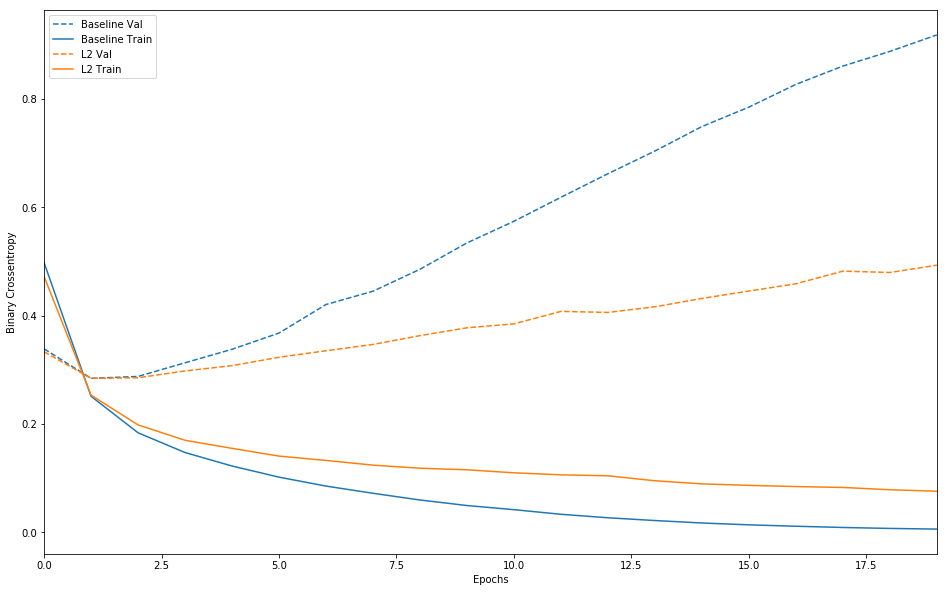

In [16]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

##### Add weight regularization

* Dropout is one of the most effective and most commonly used regularization techniques for neural networks
* Developed by Hinton and his students at the University of Toronto. 
* Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. 
* Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]. 
* The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. 
* At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [17]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6222 - acc: 0.6550 - binary_crossentropy: 0.6222 - val_loss: 0.4841 - val_acc: 0.8516 - val_binary_crossentropy: 0.4841
Epoch 2/20
 - 3s - loss: 0.4611 - acc: 0.8023 - binary_crossentropy: 0.4611 - val_loss: 0.3425 - val_acc: 0.8802 - val_binary_crossentropy: 0.3425
Epoch 3/20
 - 3s - loss: 0.3564 - acc: 0.8583 - binary_crossentropy: 0.3564 - val_loss: 0.2898 - val_acc: 0.8864 - val_binary_crossentropy: 0.2898
Epoch 4/20
 - 2s - loss: 0.2989 - acc: 0.8909 - binary_crossentropy: 0.2989 - val_loss: 0.2770 - val_acc: 0.8869 - val_binary_crossentropy: 0.2770
Epoch 5/20
 - 3s - loss: 0.2570 - acc: 0.9099 - binary_crossentropy: 0.2570 - val_loss: 0.2746 - val_acc: 0.8892 - val_binary_crossentropy: 0.2746
Epoch 6/20
 - 2s - loss: 0.2232 - acc: 0.9229 - binary_crossentropy: 0.2232 - val_loss: 0.2864 - val_acc: 0.8852 - val_binary_crossentropy: 0.2864
Epoch 7/20
 - 3s - loss: 0.1986 - acc: 0.9308 - binary_crossentropy:

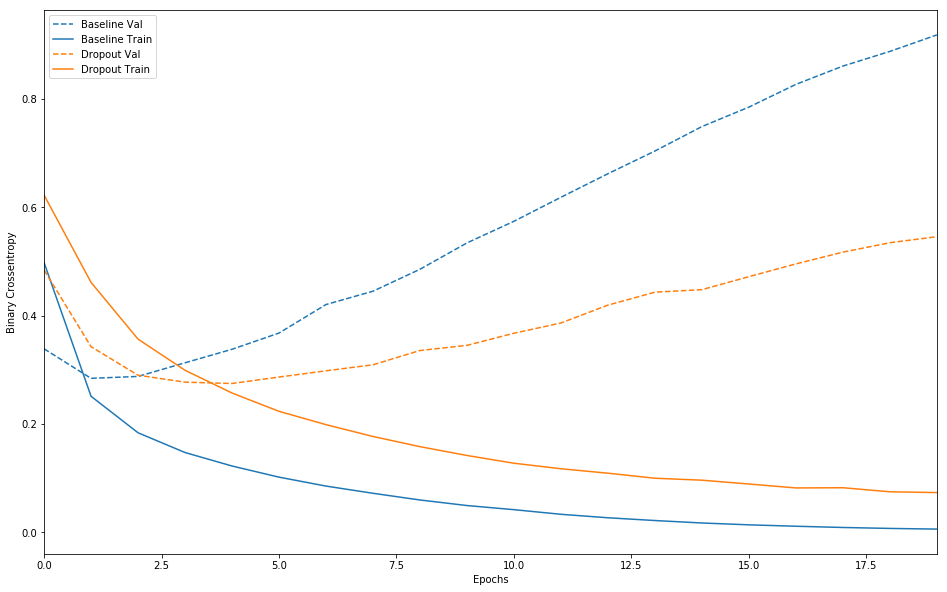

In [19]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

##### Summary
    * Get more training data.
    * Reduce the capacity of the network.
    * Add regularization.